In [ ]:
import numpy as np
import sys
import matplotlib.pyplot as plt
import os
from typing import List
sys.path.append('../../')

from package.data.mnist import load_data
from package.plot_utils.common import *
from package.plot_utils.constant import *
from package.directories import eigenvalues_dir
from package.fim.fim import compute_fims_nn
from package.effective_dimension.effective_dimension import EDType, EffectiveDimensionApprox

train_loader, test_loader = load_data()

input_dim = 28*28
output_dim = 10

eig_nn_dir = os.path.join(eigenvalues_dir, 'neural_network')
if not os.path.isdir(eig_nn_dir):
    os.mkdir(eig_nn_dir)

# Deep Narrow vs. Shallow Wide

In [ ]:
save_dir = os.path.join(eigenvalues_dir, 'neural_network', 'dn_vs_sw')
if not os.path.isdir(save_dir):
    os.mkdir(save_dir)

dn_layer_sizes = [10, 10, 10, 10]
sw_layer_sizes = [1]

_ = compute_fims_nn(input_dim, sw_layer_sizes, output_dim, 1000,
                 save_dir=save_dir,
                 data_loader=train_loader,
                 filename='shallow',
                 store=True)

_ = compute_fims_nn(input_dim, dn_layer_sizes, output_dim, 1000,
                 save_dir=save_dir,
                 data_loader=train_loader,
                 filename='deep',
                 store=True)

Computing EDs with chunk_size=5: 100%|██████████| 200/200 [00:04<00:00, 43.49it/s]


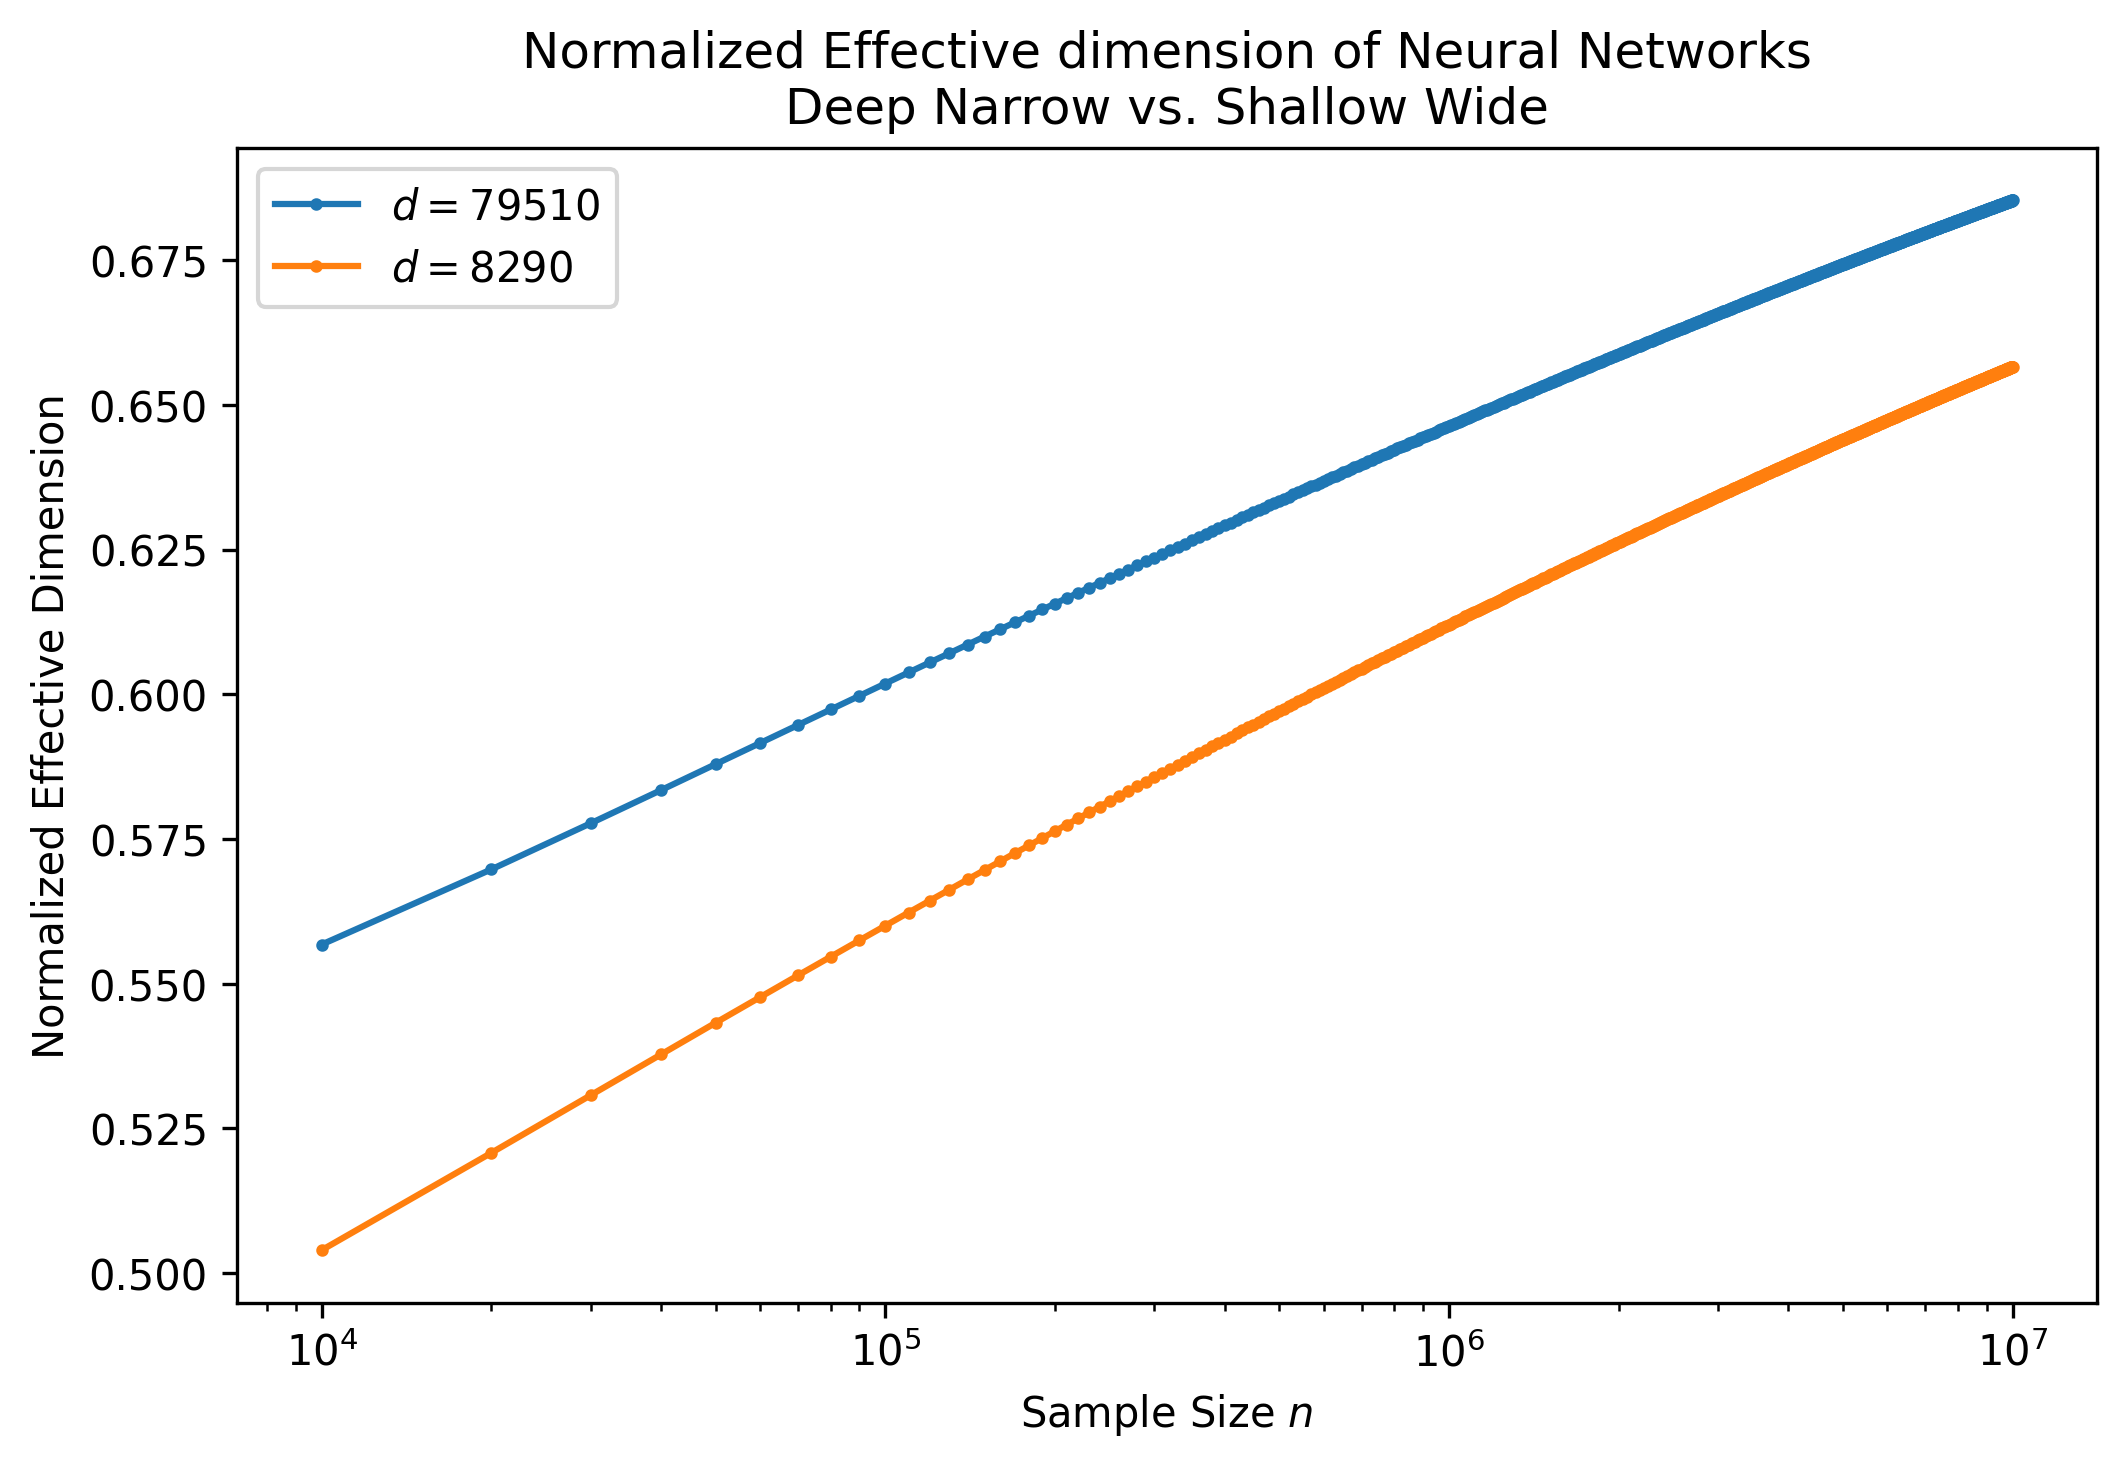

In [8]:
from package.neural_network.util import get_dimension

save_dir = os.path.join(eigenvalues_dir, 'neural_network', 'dn_vs_sw')

dn_layer_sizes = [10, 10, 10, 10]
sw_layer_sizes = [100]


sw_dim = get_dimension(input_dim, sw_layer_sizes, output_dim)
dn_dim = get_dimension(input_dim, dn_layer_sizes, output_dim)

util = PlotUtil()

options: List[PlotOption] = [
   PlotOption(os.path.join(save_dir, f'shallow_{sw_dim}.h5'), f'$d={sw_dim}$', normalized=True, dim=sw_dim, ed_type=EDType.GLOBAL, gamma=1, chunk_size=5),
   PlotOption(os.path.join(save_dir, f'deep_{dn_dim}.h5'), f'$d={dn_dim}$', normalized=True, dim=dn_dim, ed_type=EDType.GLOBAL, gamma=1, chunk_size=5),
]

util.plot(
    options,

    n_min=int(1e4),
    n_max=int(1e7),

    title="Normalized Effective dimension of Neural Networks\nDeep Narrow vs. Shallow Wide",
    ylabel="Normalized Effective Dimension",

    axis_option=AxisOption.SEMILOGX
)


# Varying Dropout Rate

### Increasing Depth

In [ ]:
save_dir = os.path.join(eigenvalues_dir, 'neural_network', 'dropout_depth')
if not os.path.isdir(save_dir):
    os.mkdir(save_dir)

for rate in [0.1, 0.2, 0.3, 0.4, 0.5]:
    for i in range(1, 5):
        dn_layer_sizes = [10] * i

        _ = compute_fims_nn(input_dim, dn_layer_sizes, output_dim, 1000,
                        save_dir=save_dir,
                        data_loader=train_loader,
                        filename=f'depth_{i}_rate_{rate}',
                        store=True,
                        dropout_rate=rate)

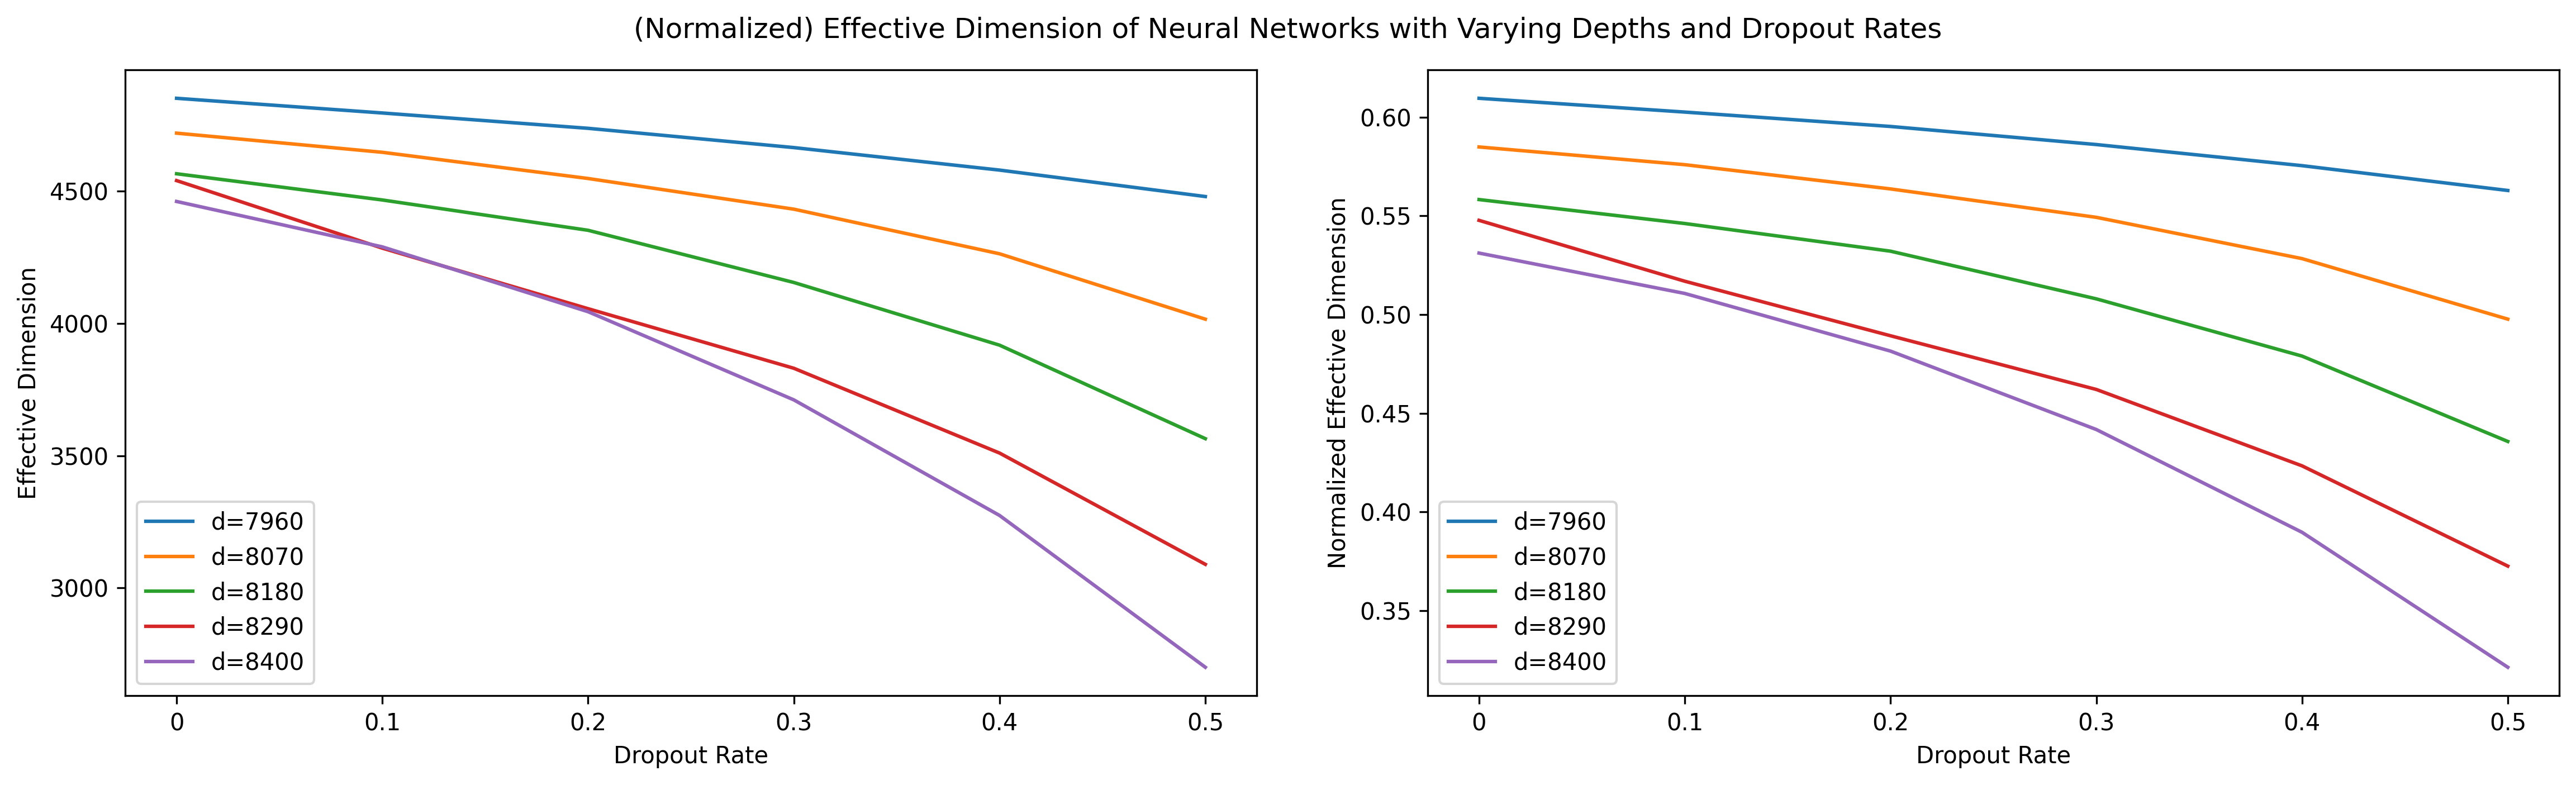

In [4]:
save_dir = os.path.join(eigenvalues_dir, 'neural_network', 'dropout_depth')

input_dim = 28*28
output_dim = 10

fig, axs = plt.subplots(1, 2, figsize=TWO_PLOTS_FIGSIZE, dpi=DPI)

for i in range(1, 6):
    eff_dims = []
    for rate in [0, 0.1, 0.2, 0.3, 0.4, 0.5]:
        dn_layer_sizes = [10] * i

        dim = get_dimension(input_dim, dn_layer_sizes, output_dim)
        file_path = os.path.join(save_dir, f'depth_{i}_rate_{rate}_{dim}.h5')


        ef = EffectiveDimensionApprox(file_path, file_path)

        eff_dims.append(ef.compute(60000, EDType.GLOBAL, eps=5e-3, chunk_size=10, verbose=False))

    axs[1].plot(range(6), np.array(eff_dims) / dim, label=f'd={dim}')
    axs[0].plot(range(6), eff_dims, label=f'd={dim}')

axs[0].set_ylabel('Effective Dimension')
axs[0].set_xlabel('Dropout Rate')
axs[0].set_xticks(range(6), [0, 0.1, 0.2, 0.3, 0.4, 0.5])
axs[0].legend()

axs[1].set_ylabel('Normalized Effective Dimension')
axs[1].set_xlabel('Dropout Rate')
axs[1].set_xticks(range(6), [0, 0.1, 0.2, 0.3, 0.4, 0.5])
axs[1].legend()

plt.tight_layout(pad=3.0)
fig.suptitle('(Normalized) Effective Dimension of Neural Networks with Varying Depths and Dropout Rates')
plt.show()

### Increasing Width

In [ ]:
save_dir = os.path.join(eigenvalues_dir, 'neural_network', 'dropout_width')
if not os.path.isdir(save_dir):
    os.mkdir(save_dir)

for rate in [0.1, 0.2, 0.3, 0.4, 0.5]:
    for i in range(1, 5):
        dn_layer_sizes = [10 * i]

        _ = compute_fims_nn(input_dim, dn_layer_sizes, output_dim, 1000,
                        save_dir=save_dir,
                        data_loader=train_loader,
                        filename=f'depth_{i}_rate_{rate}',
                        store=True,
                        dropout_rate=rate)

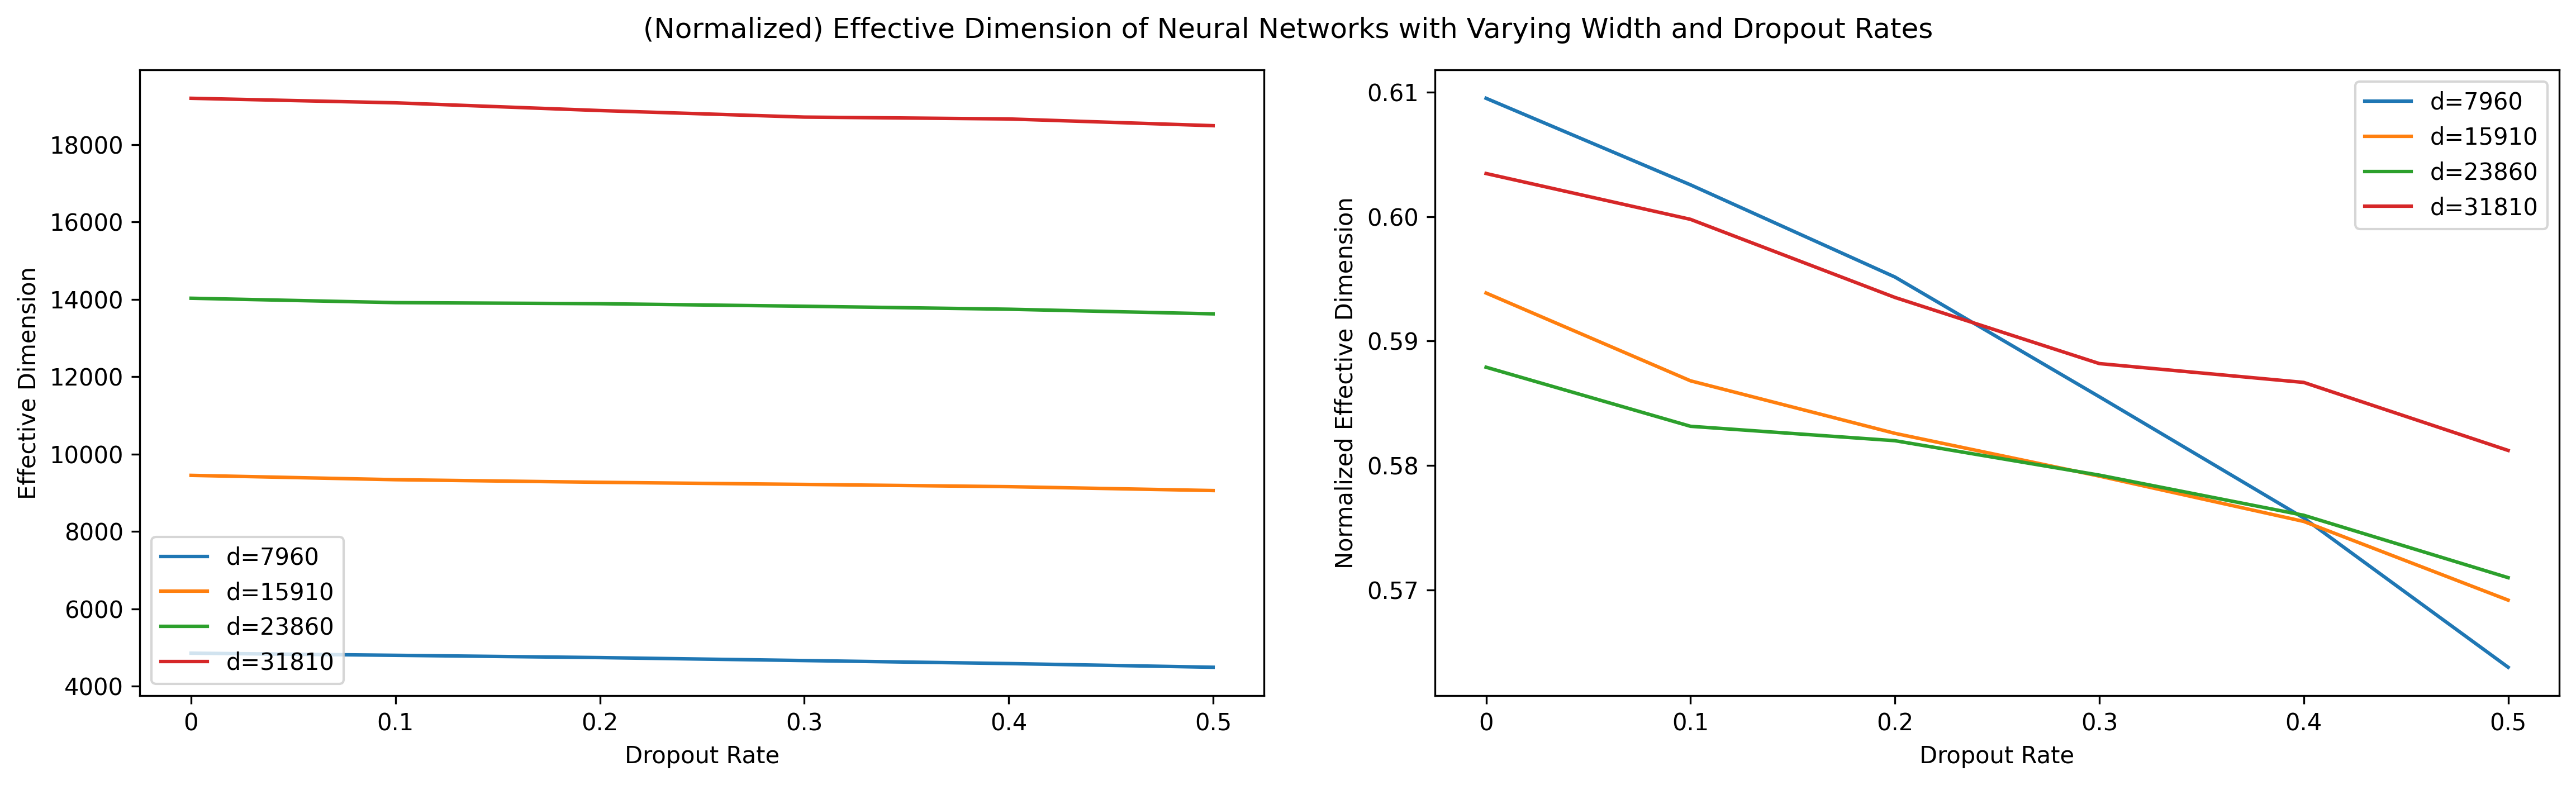

In [7]:
save_dir = os.path.join(eigenvalues_dir, 'neural_network', 'dropout_width')

input_dim = 28*28
output_dim = 10

fig, axs = plt.subplots(1, 2, figsize=TWO_PLOTS_FIGSIZE, dpi=DPI)
for i in range(1, 5):
    eff_dims = []
    for rate in [0, 0.1, 0.2, 0.3, 0.4, 0.5]:
        dn_layer_sizes = [10 * i]

        dim = get_dimension(input_dim, dn_layer_sizes, output_dim)
        file_path = os.path.join(save_dir, f'depth_{i}_rate_{rate}_{dim}.h5')


        ef = EffectiveDimensionApprox(file_path, file_path)

        eff_dims.append(ef.compute(60000, EDType.GLOBAL, eps=5e-3, chunk_size=5, verbose=False))

    axs[1].plot(range(6), np.array(eff_dims) / dim, label=f'd={dim}')
    axs[0].plot(range(6), eff_dims, label=f'd={dim}')

axs[0].set_ylabel('Effective Dimension')
axs[0].set_xlabel('Dropout Rate')
axs[0].set_xticks(range(6), [0, 0.1, 0.2, 0.3, 0.4, 0.5])
axs[0].legend(loc='lower left')

axs[1].set_ylabel('Normalized Effective Dimension')
axs[1].set_xlabel('Dropout Rate')
axs[1].set_xticks(range(6), [0, 0.1, 0.2, 0.3, 0.4, 0.5])
axs[1].legend()

plt.tight_layout(pad=3.0)
fig.suptitle('(Normalized) Effective Dimension of Neural Networks with Varying Width and Dropout Rates')
plt.show()